# カーブフィッティング

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, norm, poisson, expon

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

## カーブフィッティングとは？

手元にあるデータをある理論曲線に当てはめることを**カーブフィッティング**と呼ぶ．
データ分析では，以下の場面でカーブフィッティングが用いられる：

1. 回帰分析
   - 手元のデータから求めた散布図に対して説明変数と目的変数の間の関数関係（理論曲線）を仮定し，パラメータを調整して当てはめる
2. 確率分布のパラメータ推定
   - 手元のデータから求めたヒストグラムに対して理論的な確率分布を仮定し，そのパラメータを推定する
   - 推定したパラメータを用いてヒストグラムに理論分布を当てはめる

なお，統計モデルでは，回帰分析における関数関係や理論的な確率分布など，データを当てはめる理論曲線そのものをモデルと呼ぶ．
一方，物理モデルでは，理論曲線のことはモデルと呼ばずに，理論曲線を導くための単純化した基礎方程式などをモデルと呼ぶ．

## 回帰分析

### 単回帰モデル

データ $ X, Y $ が与えられたとき，変数 $ X,\ Y $ の間に

$$
	y = f(x; \boldsymbol{\theta}) + \varepsilon
$$(eq:regression_model)

という関数関係が成り立つとする．
ここで，$ f(x; \boldsymbol{\theta}) $ は変数 $ X $ の関数で $ \boldsymbol{\theta} = (\theta_1, \theta_2, \ldots) $ はパラメータである．
また，$ \varepsilon $ は確率的な誤差を表し，特定の確率分布に従うものとする．
この式は，与えられたデータ $ x $ に対して $ y $ を生成する数理モデルであり，**回帰モデル**と呼ばれる．
また，$ X $ を**説明変数**（独立変数），$ Y $ を**目的変数**（従属変数，被説明変数）と呼ぶ．
**回帰分析**とは，回帰モデルを用いて説明変数と目的変数の間の関係を明らかにする手法である．

回帰モデルには様々な種類が存在するが，式{eq}`eq:regression_model`のように説明変数が1つだけの場合を**単回帰モデル**，説明変数が複数ある場合を**重回帰モデル**と呼ぶ．
また，説明変数の１次関数で表されるモデルを**線形回帰モデル**，非線形な関数の場合を**非線形回帰モデル**と呼ぶ．
以下では，単回帰モデルのみを扱う．

### 最小二乗法

１つの説明変数 $ X $ と目的変数 $ Y $ について $ n $ 組のデータ $ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $ を取得したとする．
このとき，横軸に変数 $ X $，縦軸に変数 $ Y $ を取ったグラフを**散布図**と呼ぶ．
散布図に対し，回帰モデル{eq}`eq:regression_model`のパラメータを変化させて理論曲線をうまく当てはめる作業がカーブフィッティングである．
一般に，カーブフィッティングによって得られた式（**回帰曲線**）は，真の値を表す {eq}`eq:regression_model`と区別して以下のようにハット $\hat{}$ を付けて表す：

$$
	\hat{y} = f(x; \boldsymbol{\theta})
$$(eq:regression_curve)


回帰分析では，最適な曲線を求める手法がいくつか存在するが，最も基本的な手法が**最小二乗法**である．
最小二乗法では，回帰モデルによる予測値 $ \hat{y}_{i}=f(x_{i}; \boldsymbol{\theta}) $ と実データ $ y_{i} $ の差（**残差**）の二乗和

$$
	E(\boldsymbol{\theta}) = \sum_{i=1}^{n}(\hat{y}-y_{i})^{2} = \sum_{i=1}^{n}(f(x_{i}; \boldsymbol{\theta})-y_{i})^{2}
$$(eq:rss)

が最小となるようなパラメータ $ \hat{\boldsymbol{\theta}} = (\hat{\theta_1}, \hat{\theta_2}, \ldots) $ を選ぶ．
このとき，$ E $ のことを**残差変動**（残差平方和）と呼ぶ．
残差変動 $ E $ を最小にすることは，$ \theta_1,\ \theta_2,\ \ldots $ を変数とする関数 $ E(\boldsymbol{\theta}) $ の最小値を求めることと言い換えられる．
このための必要条件は，残差変動 $ E(\boldsymbol{\theta}) $ の $ \theta_1,\ \theta_2,\ \ldots $ による偏微分がゼロになることである：

$$
	\frac{\partial E}{\partial \theta_1} = 0, \quad \frac{\partial E}{\partial \theta_2} = 0,\ \ldots
$$(eq:rss_diff)

### 線形単回帰モデル

#### 理論

線形単回帰モデルは

\begin{align}
 y = ax + b + \varepsilon
\end{align}

で与えられる．
この場合には，最小二乗法による最適なパラメータ $ a,\ b $ を理論的に求めることができる．
実際に条件を適用すると，$ a,\ b $ を変数とする以下の連立方程式が得られる：

\begin{align*}
	\sum_{i=1}^{n} (ax_{i}+b-y_{i})x_{i} &= 0 \\
	\sum_{i=1}^{n} (ax_{i}+b-y_{i}) &= 0
\end{align*}

この連立方程式を解くと，$ a,\ b $ は

\begin{align}
	a &=\frac{\displaystyle\left(\frac{1}{n}\sum_{i=1}^{n} x_{i}y_{i}\right) - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)\left(\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)}{\displaystyle \left(\frac{1}{n}\sum_{i=1}^{n} x_{i}^{2}\right) -  \left(\frac{1}{n}\sum_{i=1}^{n}x_{i}\right)^{2}}
	   = \frac{\overline{xy}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2} \\[10pt]
	b &= \left(\frac{1}{n} \sum_{i=1}^{n}y_{i}\right) - a\left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right) = \bar{y} - a \bar{x}
\end{align}

と求まる．

なお，傾き $ a $ の式は $ X, Y $ の共分散を $ X $ の分散で割った形になっている（相関係数の式に似ているが違う）．
よって，傾き $ a $ が正なら正の相関，負なら負の相関，ゼロなら無相関であることが分かる．

#### 決定係数

$ n $ 組のデータ $ (x_{1}, y_{1}), \ldots (x_{n}, y_{n}) $ に対して，データ $ Y $ のばらつきを

$$
  S_{y}^{2} = \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}
$$

と定義する．
これを**全変動**と呼ぶ．
また，実データと予測値のズレは残差変動{eq}`eq:rss`によって表される．
ここでは，残差変動を

$$
  \displaystyle S_{e}^{2} = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}
$$

と表す．

このとき，回帰直線のデータへの当てはまりの良さを

$$
	R^{2} = 1 - \frac{S_{e}^{2}}{S_{y}^{2}}
$$(eq:R2)

で定義する．
これを**決定係数**と呼ぶ（他の定義もあるので注意）．

最小二乗法による単回帰分析の場合，決定係数は $ X,\ Y $ の相関係数の２乗に等しく，その定義域は $ 0 \leq R^{2} \leq 1 $ である．
よって，以下が成り立つ
- 残差変動 $ S_{e}^{2} $ が小さくなると $ R^{2} $ は $ 1 $ に近づく（データへの当てはまりが良い）
- 残差変動 $ S_{e}^{2} $ が大きくなると $ R^{2} $ は $ 0 $ に近づく（データへの当てはまりが悪い）

※ 予測値 $ \hat{y} $ が最小二乗法以外の方法によって決められた場合，決定係数が負になることもあり，さらに相関係数の２乗にはならない．

#### Pythonによる実装

`scipy`には最小二乗法を用いてカーブフィッティングを実行するための `scipy.optimize.curve_fit` 関数が用意されている．
`curve_fit` 関数は以下のように使用する．

**1. フィッティングに用いる関数を定義する**

In [2]:
# フィッティング関数の定義
def func(x, a, b):
    return a*x + b

この関数は，第1引数に $ x $ 座標のデータ，第２引数以降にパラメータを入力し，出力として $ y $ 座標のデータが得られる．

**2. フィッティング対象となる実データを用意する**

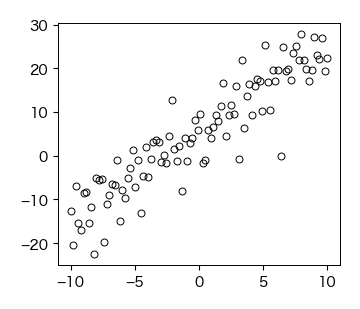

In [3]:
# データの作成
np.random.seed(1234)
x_data = np.linspace(-10, 10, num=100)
y_data = func(x_data, 2, 5) + 5.*np.random.randn(x_data.size)

fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'ko', mfc='None');

**3. フィッティングを実行する**

`curve_fit` 関数には，第1引数にフィッティング関数，第2, 3引数にデータ，それ以降にオプションを指定する．
オプションにはパラメータの初期値 `p0` などを指定することができる．
`curve_fit` 関数を実行すると，戻り値として最小二乗法によって得られた最適なパラメータ（`p_opt`） と共分散（`p_cov`）が得られる．

In [8]:
# フィッティングの実行
p_opt, p_cov = curve_fit(func, x_data, y_data)
print(p_opt)

[1.98277627 5.17556142]


以下は公式から得られた最適解を求めた結果である．
確かに，`curve_fit` 関数から求めた値と同じ値が得られていることが分かる．

In [9]:
# 公式から
nume = np.mean(x_data * y_data) - np.mean(x_data) * np.mean(y_data)
denom = np.mean(x_data**2) - np.mean(x_data)**2
a = nume / denom
b = np.mean(y_data - a*x_data)
print(a, b)

1.9827762695911915 5.1755614156271825


**4. フィッティング結果を可視化する**

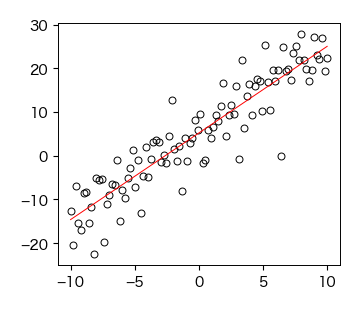

In [10]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'ko', mfc='None')
ax.plot(x_data, func(x_data, p_opt[0], p_opt[1]), 'r-', mfc='None');

**5. 決定係数を求める**

In [14]:
# 決定係数
y_reg = func(x_data, p_opt[0], p_opt[1]) # 回帰直線の値
R2 = 1 - np.var(y_data-y_reg) / np.var(y_data) # 決定係数
R2

0.8436624302090605

In [15]:
# 相関係数の２乗
r_xy = pd.DataFrame(np.c_[x_data, y_data]).corr()[0][1] # pandasのcorr()関数で相関係数を計算
r_xy**2

0.8436624302090611

### 非線形単回帰モデル

**1. フィッティングに用いる関数を定義する**

In [11]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

**2. フィッティング対象となる実データを用意する**

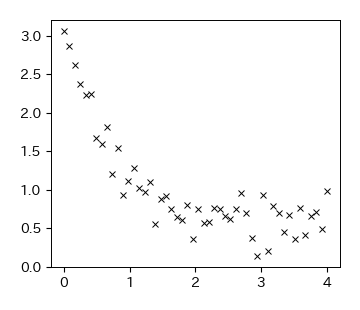

In [12]:
x_data = np.linspace(0, 4, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x_data))

fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'x');

**3. フィッティングを実行する**

In [13]:
# フィッティングの実行
opt_p = curve_fit(func, x_data, y_data)[0]
print(opt_p)

[2.60564567 1.52585213 0.57280183]


**4. フィッティング結果を可視化する**

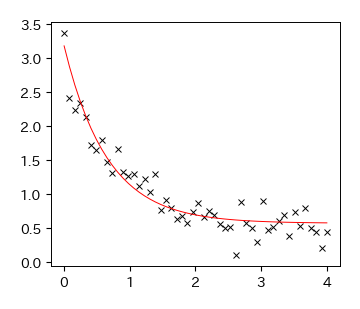

In [17]:
x_data = np.linspace(0, 4, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x_data))

fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'x')
ax.plot(x_data, func(x_data, opt_p[0], opt_p[1], opt_p[2]), 'r-', mfc='None');

#### 演習問題


## 確率分布のパラメータ推定


手元にあるデータから作成したヒストグラムがある確率分布に従うと仮定し，データに合うように確率分布のパラメータを推定することもカーブフィッティングの一つである．

確率分布のパラメータ推定では，以下の方法がよく用いられる：

- 最小二乗法
- 最尤推定

このうち，最小二乗法によるパラメータ推定は回帰分析と手続きは同じである．
そこで，以下では最尤推定を扱う．

### ヒストグラムの作成とフィッティング

与えられた観測データからヒストグラムを作成し，適当な確率分布をフィッティングするプログラムを作成してみよう．

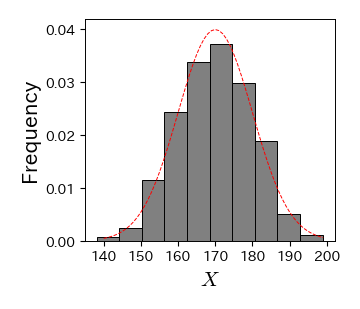

In [140]:
'''ヒストグラムの描画'''
# データの作成
np.random.seed(20)
x_data = np.random.normal(loc=170, scale=10, size=1000)

# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(x_data, bins=10, density=1, color='gray', edgecolor='k')

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

'''フィッティング'''
x = np.arange(140, 200)
ax.plot(x, norm.pdf(x, loc=170, scale=10), 'r--')

### 最尤推定

以下では，パラメータ $ \boldsymbol{\theta} $ を持つ1次元確率分布を $ f(x|\boldsymbol{\theta}) $ と表記する（ $ f(x; \boldsymbol{\theta}) $ と表す場合もある）．
例えば，正規分布は平均 $ \mu $ と標準偏差 $ \sigma $ をパラメータとして持つので $ \boldsymbol{\theta}=\{\mu, \sigma\} $ である．

いま，手元にある $ n $ 個のデータ $ (x_{1}, x_{2}, \ldots, x_{n}) $ が確率分布 $ f(x|\boldsymbol{\theta}) $ から独立に得られたとする．
すなわち，$ x_{i} $ というデータが得られる確率は $ f(x_{i}|\boldsymbol{\theta}) $，手元にある $ n $ 個のデータが得られる確率は

$$
    f(x_{1}, x_{2},\ldots, x_{n}|\boldsymbol{\theta}) = \prod_{i=1}^{n} f(x_{i}|\boldsymbol{\theta})
$$

と表される．

確率 $ f(x_{1}, x_{2},\ldots, x_{n}|\boldsymbol{\theta}) $ はパラメータ $ \boldsymbol{\theta} $ によって変化するので，データ $ x_{1},\ x_{2},\ \ldots, x_{n} $ を固定して，パラメータ $ \boldsymbol{\theta} $ の関数と見ることもできる．
これを**尤度関数**と呼び，

$$
    L(\boldsymbol{\theta}|x_{1},x_{2},\ldots) = \prod_{i=1}^{n} f(x_{i}|\boldsymbol{\theta})
$$

と表記する．

以上を踏まえ，手元にある $ n $ 個のデータを基に，生成元となった確率分布 $ f(x|\boldsymbol{\theta}) $ の形を推定することを考える．
ただし，$ f(x|\boldsymbol{\theta}) $ には特定の確率分布（例えば，正規分布や指数分布など）を仮定した上で最も最適なパラメータ $ \boldsymbol{\theta} $ を推定するものとする．

最適なパラメータを選ぶ基準は色々と考えられるが，手元にあるデータが得られる確率が最大となるようなパラメータ $\boldsymbol{\theta} $ を最適な（尤もらしい）パラメータとする手法が**最尤法**である．
これは，尤度関数 $ L(\boldsymbol{\theta}|x_{1},x_{2},\ldots) $ を最大化するようなパラメータを最適とする手法と言い換えることもできる．
なお，尤度関数そのものを最大化しようとすると計算が複雑になるので，一般的には尤度関数の対数を取った対数尤度 $ \log L(\boldsymbol{\theta}|x_{1},x_{2},\ldots) $ を最大化することが多い．

対数尤度関数を最大化するパラメータは以下の条件を満たす：

$$
    \frac{\partial \log L}{\partial \theta_{1}} = 0, \quad \frac{\partial \log L}{\partial \theta_{2}} = 0, \quad \cdots, \quad \frac{\partial \log L}{\partial \theta_{n}} = 0
$$

これを**対数尤度方程式**と呼ぶ．
対数尤度関数が凸関数の場合，対数尤度方程式を解けば最尤推定値が得られる．

### ベルヌーイ分布

#### 解析解

ベルヌーイ分布は以下の式で与えられる：

$$
    f(x|p) = p^{x}(1-p)^{1-x}
$$

ただし，$ x $ の取りうる値は $ 0, 1 $ のみである．
観測データ $ x_{1}, \ldots, x_{n} $ に対する尤度関数は

$$
    L(p|x_{1}, \ldots, x_{n}) = p^{\sum_{i}x_{i}}(1-p)^{n-\sum_{i}x_{i}}
$$

対数尤度関数は

$$
    \log L(p|x_{1}, \ldots, x_{n}) = \left(\sum_{i} x_{i}\right) \log p + \left(n-\sum_{i}x_{i}\right)\log(1-p)
$$

となる．

これより，対数尤度方程式は

$$
    \frac{dL}{dp} = \frac{\sum_{i}x_{i}}{p} - \frac{n-\sum_{i}x_{i}}{1-p} = 0
$$

となり，これを解けば

$$
    p = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

が得られる．
すなわち，$ p $ の最尤推定値は観測データの標本平均である．

#### Pythonによる実装

ここでは，$ p=0.3 $ のベルヌーイ分布からサイズ100の標本を得る場合を考える．
すなわち，$ p=0.3 $ がパラメータの真の値である．

In [2]:
np.random.seed(seed=32)
p = 0.3
x = bernoulli.rvs(p, size=100)
x

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

次に，得られた標本（観測データ）から尤度関数を求める．

In [3]:
L = []
P = np.arange(0, 1, 0.01)

# 様々なPについて尤度を計算する
for p in P:
    l = np.prod(bernoulli.pmf(x, p))
    L.append(l)

L = np.array(L)

最後に，尤度関数を描画し，さらに尤度関数が最大となる $ p $ の値をグラフ中にプロットする．

最尤推定値： 0.26


(0.0, 1.3603279030607903e-25)

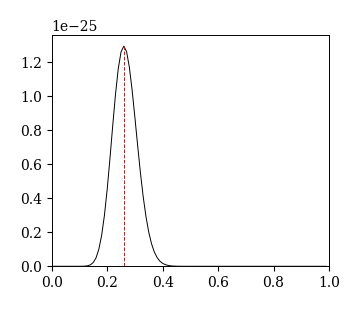

In [4]:
# 尤度関数の描画
fig, ax = plt.subplots()
ax.plot(P, L)
ax.vlines(P[np.argmax(L)], 0, np.max(L), color='r', linestyles='dashed')
print('最尤推定値：', P[np.argmax(L)])
ax.set_xlim(0, 1); ax.set_ylim(ymin=0)

得られた最尤推定値は $ p=0.26 $ であるが，これは解析解である標本平均と一致している．

### 正規分布

#### 解析解

正規分布の確率密度関数は以下で与えられる：

$$
    f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

観測データ $ x_{1}, \ldots, x_{n} $ に対する尤度関数は

$$
    L(\mu, \sigma|x_{1}, \ldots, x_{n}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}}
    = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x-\mu)^2\right]
$$

対数尤度関数は

$$
    \log L = -\frac{n}{2} \log(2\pi) -\frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_{i}-\mu)^2
$$

である．

これより，対数尤度方程式は

\begin{align*}
    \frac{\partial L}{\partial \mu} &= -\frac{1}{2\sigma^2} \sum_{i}^{n}2(x_{i}-\mu)\times (-1)
    = \frac{1}{\sigma^2}\sum_{i}^{n}(x_{i}-\mu) = 0 \\
    \frac{\partial L}{\partial \sigma^2} &= -\frac{n}{2\sigma^2} - \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_{i} - \mu)^2 = 0
\end{align*}

となり，これらを解けば，

\begin{align*}
    \mu &= \frac{1}{n}\sum_{i=1}^{n}x_{i}\\
    \sigma^2 &= \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^2
\end{align*}

が得られる．
すなわち，$ \mu,\ \sigma^2 $ の最尤推定値はそれぞれ標本平均と標本分散である．

#### Pythonによる実装

In [37]:
# 1. 標準正規分布からサイズ100の標本を生成する
np.random.seed(seed=32)
mu, sigma = 0, 1
x = norm.rvs(loc=mu, scale=sigma, size=100)

In [115]:
# 2. この標本を基に，正規分布の平均と標準偏差をx, y軸，尤度関数をz軸とするグラフを描画する
mean_range = np.linspace(-0.1, 0.1, 100)
std_dev_range = np.linspace(0.9, 1.1, 100)
M, S = np.meshgrid(mean_range, std_dev_range)
L = []

for m, s in zip(M.ravel(), S.ravel()):
    # L.append(np.log(np.prod(norm.pdf(x, loc=m, scale=s))))
    L.append(np.prod(norm.pdf(x, loc=m, scale=s)))

L = np.array(L).reshape(M.shape)

Text(0.5, 0, 'Likelihood')

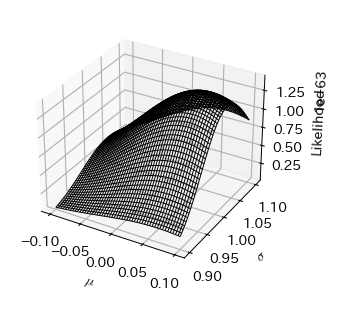

In [111]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_wireframe(M, S, L)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Likelihood')

In [112]:
# 3. 最尤推定値を計算する
mle_mean = np.mean(x)
mle_std_dev = np.std(x, ddof=0)

print(f'MLE of mean: {mle_mean}')
print(f'MLE of standard deviation: {mle_std_dev}')

MLE of mean: 0.06368595578464202
MLE of standard deviation: 1.02857877771493


In [113]:
M[np.where(L==L.max())]

array([0.0638796])

In [114]:
S[np.where(L==L.max())]

array([1.02842809])

**求めたパラメータでカーブフィッティング**

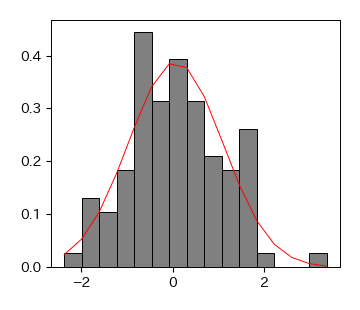

In [128]:
# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(x, bins=15, density=1, color='gray', edgecolor='k')
ax.plot(ret[1], norm.pdf(ret[1], loc=mle_mean, scale=mle_std_dev), 'r-')

### 演習問題

**指数分布の最尤推定**

指数分布

$$
    f(x|\lambda) = \frac{1}{\lambda}\mathrm{e}^{-\frac{x}{\lambda}}
$$

について，最尤推定値の解析解を計算せよ．
また，適当な $ \lambda $ の値について最尤推定値を求めるPythonプログラムを作成せよ．

**ポアソン分布の最尤推定**

ポアソン分布

$$
    f(x|\lambda) = \frac{\lambda^{x}\mathrm{e}^{-\lambda}}{k!}
$$

について，最尤推定値の解析解を計算せよ．
また，適当な $ \lambda $ の値について最尤推定値を求めるPythonプログラムを作成せよ．